# Ejercicio componentes principales

In [1]:
%autosave 0
import pandas as pd
import numpy as np
from plotnine import *
from numpy.linalg import svd

Autosave disabled


Datos de whiskies de Escocia:

In [2]:
whisky = pd.read_csv('../datos/whiskies.csv')
whisky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
RowID         86 non-null int64
Distillery    86 non-null object
Body          86 non-null int64
Sweetness     86 non-null int64
Smoky         86 non-null int64
Medicinal     86 non-null int64
Tobacco       86 non-null int64
Honey         86 non-null int64
Spicy         86 non-null int64
Winey         86 non-null int64
Nutty         86 non-null int64
Malty         86 non-null int64
Fruity        86 non-null int64
Floral        86 non-null int64
Postcode      86 non-null object
 Latitude     86 non-null int64
 Longitude    86 non-null int64
dtypes: int64(15), object(2)
memory usage: 11.5+ KB


In [3]:
trad_columnas = {'Body':'Cuerpo', 'Sweetness':'Dulzura', 'Smoky':'Humoso', 'Tobacco':'Tabaco',
                'Honey':'Miel', 'Spicy':'Picante', 'Winey':'Vinoso', 'Nutty':'Nuez',
                'Malty':'Malta', 'Fruity':'Afrutado'}
whisky = whisky.rename(columns=trad_columnas)
whisky.describe()

,RowID,Cuerpo,Dulzura,Humoso,Medicinal,Tabaco,Miel,Picante,Vinoso,Nuez,Malta,Afrutado,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,43.500000,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,287247.162791,8.026597e+05
std,24.969982,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,67889.046814,8.802422e+04
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,5.542600e+05
25%,22.250000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,265672.500000,7.556975e+05
50%,43.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,319515.000000,8.398850e+05
75%,64.750000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,328630.000000,8.507700e+05
max,86.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06


Haremos el análisis para algunos whiskies y dejaremos otros fuera

In [4]:
whisky

,RowID,Distillery,Cuerpo,Dulzura,Humoso,Medicinal,Tabaco,Miel,Picante,Vinoso,Nuez,Malta,Afrutado,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960


In [5]:
whisky_entrena = whisky.iloc[0:80, :]
whisky_prueba = whisky.iloc[80:, :]

### 1. Calcular componentes

Calcula componentes para los whiskies del conjunto de entrenamiento

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
# ajustar - esto centra los datos automáticamente
whisky_pca = pca.fit(whisky_entrena.loc[:,'Cuerpo':'Floral'])
nombres_vars  = whisky.loc[:,'Cuerpo':'Floral'].columns
# varianza explicada
var_componente = np.append(0, whisky_pca.explained_variance_)
var_acumulada = np.cumsum(var_componente)
var_acumulada_pct = 100 * var_acumulada / sum(var_componente)
var_acumulada_pct
var_pct_df = pd.DataFrame({'varianza_acum':var_acumulada_pct,
                          'varianza_comp':var_componente}).reset_index()
var_pct_df

,index,varianza_acum,varianza_comp
0,0,0.000000,0.000000
1,1,31.579136,2.477463
2,2,51.178583,1.537626
3,3,60.351133,0.719610
4,4,68.612667,0.648138
5,5,75.167173,0.514218
6,6,81.024309,0.459507
7,7,86.271998,0.411695
8,8,90.553434,0.335889
9,9,93.987147,0.269384


Grafica e interpreta la varianza acumulada

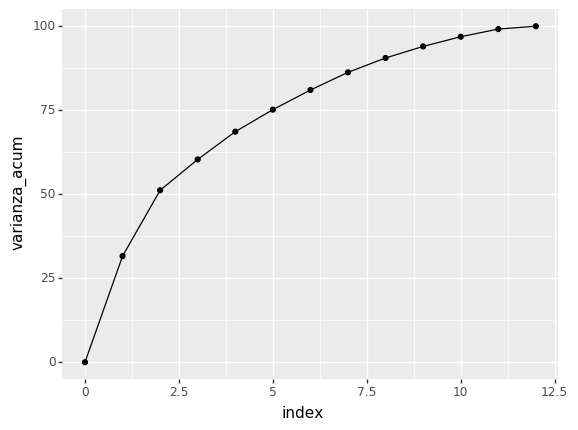

<ggplot: (8726360965696)>

In [7]:
(ggplot(var_pct_df, aes('index', 'varianza_acum')) + geom_line() + geom_point())

Haz una *gráfica de sedimentación* de la varianza explicada por componente (componente vs varianza explicada de la componente.

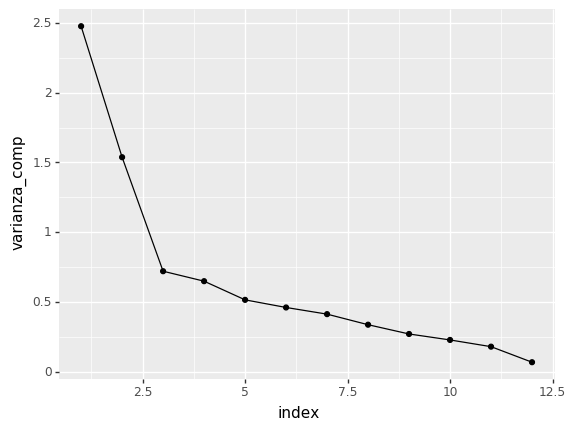

<ggplot: (8726358851343)>

In [8]:
# calcula los datos
graf_scree_df = var_pct_df.loc[var_pct_df.index > 0 ]
# grafica
(ggplot(graf_scree_df, aes('index', 'varianza_comp')) + geom_point() + geom_line())

**Idea de gráfica de sedimentación**: Escoger las componentes que aportan mucho, detenernos cuando no aportan mucha 
    varianza relativa. ¿Cuántas componentes seleccionamos según este criterio?

## 2. Interpretar componentes

Interpreta las primeras dos componentes usando los pesos:

In [9]:
comps_2 = whisky_pca.components_[0:2, ].transpose()
comps_df = pd.DataFrame(comps_2)
comps_df.index = nombres_vars
comps_df.sort_values(0)


,0,1
Floral,-0.387757,-0.143412
Miel,-0.221862,0.409335
Afrutado,-0.208827,0.129158
Dulzura,-0.205296,0.024432
Malta,-0.115570,0.077885
Nuez,-0.052383,0.232885
Vinoso,-0.043345,0.649853
Picante,0.058936,0.179097
Tabaco,0.096822,-0.019666
Cuerpo,0.342733,0.497549


In [10]:
comps_df.sort_values(1)


,0,1
Medicinal,0.582858,-0.164557
Floral,-0.387757,-0.143412
Tabaco,0.096822,-0.019666
Dulzura,-0.205296,0.024432
Humoso,0.476078,0.069943
Malta,-0.115570,0.077885
Afrutado,-0.208827,0.129158
Picante,0.058936,0.179097
Nuez,-0.052383,0.232885
Miel,-0.221862,0.409335


**Interpretación**

1. La componente uno contrasta productos medicionales y humosos contra dulces
2. La componente dos contrasta productos productos con cuerpo y vinosos contra otros más ligeros

### 3. Graficar

Grafica los scores de los whiskies para las primeras dos componentes. 

In [11]:
scores = whisky_pca.transform(whisky_entrena.loc[:,'Cuerpo':'Floral'])
scores.shape
scores_2 = scores[:, 0:2]
scores_entrena_df = pd.DataFrame(scores_2).rename(columns = {0:'Comp_1', 1:'Comp_2'})
scores_entrena_df

,Comp_1,Comp_2
0,-0.531466,1.056780
1,-1.520356,2.892726
2,-1.260568,-0.765982
3,5.268958,-0.505394
4,0.214755,0.089731
...,...,...
75,-1.325388,1.605862
76,-0.716747,-0.876738
77,3.632973,0.331243
78,-1.313485,-0.572548


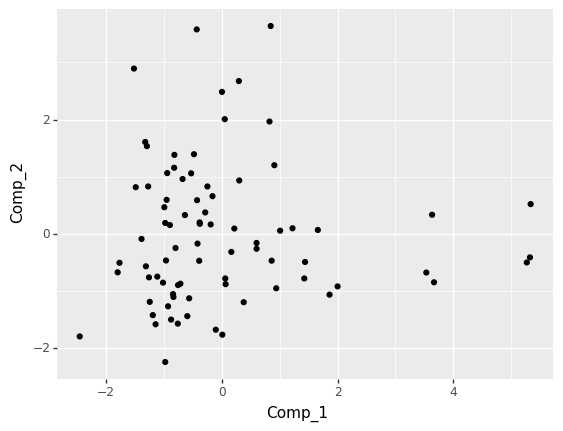

<ggplot: (-9223363310502321043)>

In [12]:
(ggplot(scores_entrena_df, aes('Comp_1', 'Comp_2')) + geom_point())

### 4. Ajustar para nuevos datos

Ahora calcula los scores de los whiskies (usando transform, sin reajustar) que dejamos fuera. Agrega el nombre de la destilería.

In [13]:
scores_prueba = whisky_pca.transform(whisky_prueba.loc[:,'Cuerpo':'Floral'])[: ,0:2]
scores_prueba_df = pd.DataFrame(scores_prueba).rename(columns = {0:'Comp_1', 1:'Comp_2'})
scores_prueba_df['destilería'] = whisky_prueba['Distillery'].values
scores_prueba_df

,Comp_1,Comp_2,destilería
0,0.976648,-1.668597,Teaninich
1,-0.842982,-1.656168,Tobermory
2,0.223314,0.262667,Tomatin
3,-1.534815,-0.816628,Tomintoul
4,0.507466,-0.300826,Tormore
5,-0.605951,-0.457240,Tullibardine


Ahora añade estos puntos a la gráfica anterior. Pon las etiquetas de estos nuevos 8 whiskies:

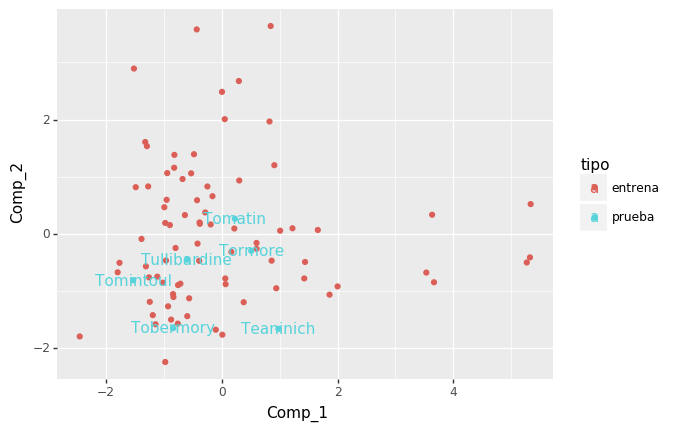

<ggplot: (-9223363310495924427)>

In [14]:
scores_entrena_df['destilería'] = ''
scores_entrena_df['tipo'] = 'entrena'
scores_prueba_df['tipo'] = 'prueba'
scores = pd.concat([scores_entrena_df, scores_prueba_df], sort=False)
(ggplot(scores, aes('Comp_1', 'Comp_2', color='tipo', label='destilería')) + geom_point() + geom_text())

**Pregunta extra**: Haz cuadrantes y ponle nombres a los cuadrantes, para crear una *gráfica de consultor*